# Dataset Selection


As a group, we discussed three datasets that we found interesting. Given below are the datasets:
1.	Star Classification: This dataset classifies stars into six class types
2.	Mobile Price Prediction: This dataset classifies the mobile prices into 3 ranges(low, high, very high).
3.	Car Price Prediction: This dataset predicts the price of cars

We discussed the pros and cons for each dataset, and also checked with our Lab Tutor Professor Ali. Some notes from our discussion:

	Star Classification was an interesting and unique dataset, but only had 6 attributes. This was not enough to perform feature selection with and derive new conclusions. We rejected this dataset for this reason.

	Car Price prediction had a good number of attributes (26 columns), however most of these columns were information that we could not use or was not clearly described. We realized that there was a lack of quality in the data. There was also the issue of the prices being continuous variables, and not a classification, this would require us to clean and transform the data. Transforming the data to price ranges for the purpose of classification would result in the data being biased to the range we have chosen. Therefore, this dataset was rejected.

	In the end, mobile price prediction was the chosen dataset for our coursework. It had a good amount of attributes (22 Columns), clear attribute descriptions, a price range for low, high and very high costs. The number of columns was a good quantity to perform feature selection and derive new conclusions. Mobiles are also a technological device that we are well versed in, and therefore it was an interesting topic for us. Thus, this was the final dataset chosen.

We decided to choose two datasets, one which was image based and one numerical and data focused. For the image dataset, we chose face mask detection. This dataset classifies whether a person is wearing a mask, not wearing a mask, or wearing it incorrectly

The links to the two final chosen datasets:
1.	Mobile price prediction: https://www.kaggle.com/code/vikramb/mobile-price-prediction
2.	Face-mask detection: https://www.kaggle.com/datasets/andrewmvd/face-mask-detection


# Setup

In [2]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required

In [3]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [49]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request
np.random.seed(42)
import csv

In [46]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [6]:
load_dataset=pd.read_csv('/Users/HP/Desktop/train.csv') #loading the dataset

In [7]:
load_dataset.head() #print the first 5 rows

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [8]:
load_dataset.shape #the shape of the dataset the number of rows and columns

(2000, 21)

In [9]:
mobile=load_dataset #intialise variable mobile to store the dataset

In [10]:
mobile.info() #basic info abt the dataset to check if there are any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [11]:
mobile.describe() #This method shows a statistical summary of the numerical attributes 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


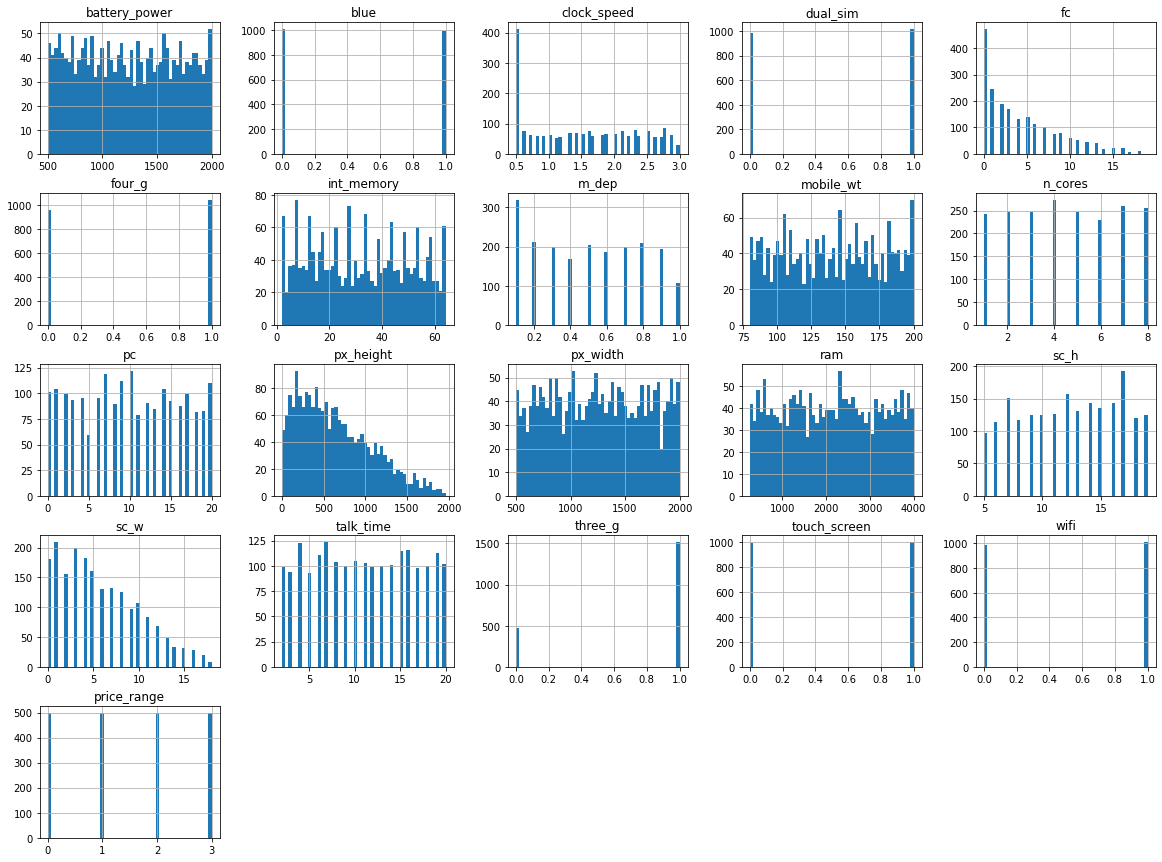

In [25]:
mobile.hist(bins=50, figsize=(20,15)) #To plot a histogram for each numerical attribute
plt.show()

<AxesSubplot:xlabel='battery_power', ylabel='price_range'>

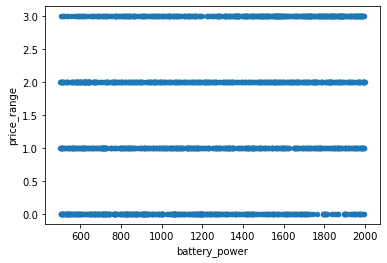

In [13]:
mobile.plot(kind="scatter", x="battery_power", y="price_range")

<AxesSubplot:xlabel='px_width', ylabel='price_range'>

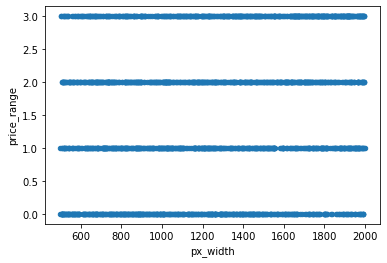

In [32]:
mobile.plot(kind="scatter", x="px_width", y="price_range")

<AxesSubplot:xlabel='ram', ylabel='price_range'>

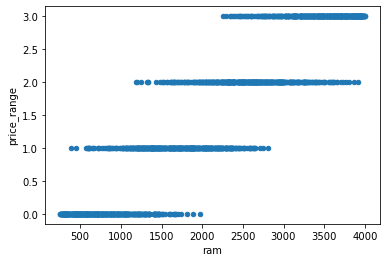

In [28]:
mobile.plot(kind="scatter", x="ram", y="price_range")

<AxesSubplot:xlabel='ram', ylabel='price_range'>

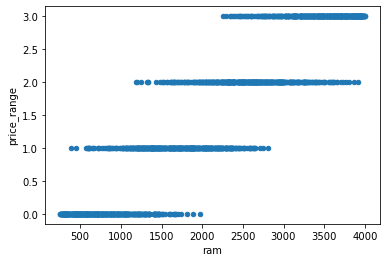

In [16]:
mobile.plot(kind="scatter", x="ram", y="price_range")

In [17]:
corr_matrix = mobile.corr() # Now we will look at the correlation of all the attributes with the expected class attribute (median-house-value)

In [18]:
corr_matrix["price_range"].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

In [19]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='price_range', ylabel='price_range'>,
        <AxesSubplot:xlabel='ram', ylabel='price_range'>,
        <AxesSubplot:xlabel='battery_power', ylabel='price_range'>,
        <AxesSubplot:xlabel='px_width', ylabel='price_range'>],
       [<AxesSubplot:xlabel='price_range', ylabel='ram'>,
        <AxesSubplot:xlabel='ram', ylabel='ram'>,
        <AxesSubplot:xlabel='battery_power', ylabel='ram'>,
        <AxesSubplot:xlabel='px_width', ylabel='ram'>],
       [<AxesSubplot:xlabel='price_range', ylabel='battery_power'>,
        <AxesSubplot:xlabel='ram', ylabel='battery_power'>,
        <AxesSubplot:xlabel='battery_power', ylabel='battery_power'>,
        <AxesSubplot:xlabel='px_width', ylabel='battery_power'>],
       [<AxesSubplot:xlabel='price_range', ylabel='px_width'>,
        <AxesSubplot:xlabel='ram', ylabel='px_width'>,
        <AxesSubplot:xlabel='battery_power', ylabel='px_width'>,
        <AxesSubplot:xlabel='px_width', ylabel='px_width'>]], dtype=objec

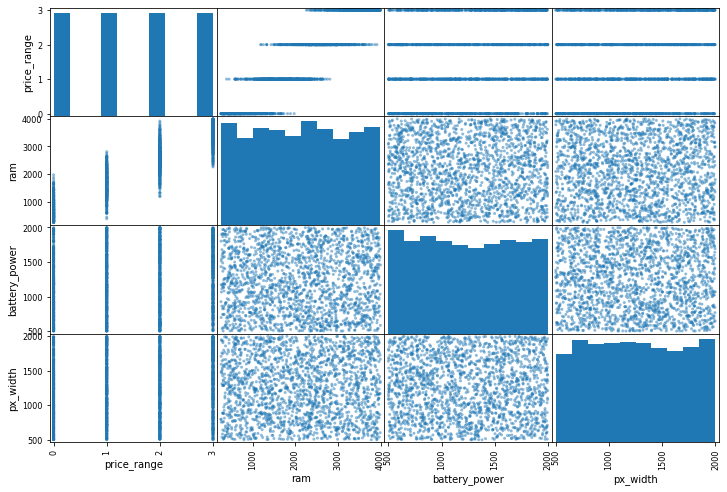

In [31]:
attributes = ["price_range", "ram", "battery_power",
              "px_width"]
scatter_matrix(mobile[attributes], figsize=(12, 8))

(0.0, 3998.0, 0.0, 4.0)

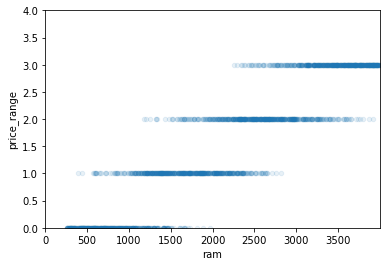

In [30]:

mobile.plot(kind="scatter", x="ram", y="price_range",
             alpha=0.1)
plt.axis([0, 3998, 0, 4])
#Q7 Describe the plot below. What does this indicate? Do you have an explanation for the solid line? #when u have lower ram constitutes to a lower price range

In [34]:
mobile["screensize"]=mobile["px_height"]*mobile["px_width"]


<AxesSubplot:xlabel='screensize', ylabel='price_range'>

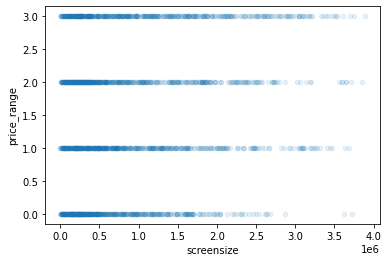

In [36]:

mobile.plot(kind="scatter", x="screensize", y="price_range",
             alpha=0.1)

In [48]:
load_dataset1=pd.read_csv('/Users/HP/Desktop/train - Copy.csv') #loading the dataset

In [57]:
df = pd.read_csv('/Users/HP/Desktop/train - Copy.csv') 

In [58]:
for index, row in df.iterrows():
    print(row)

battery_power     842.0
blue                0.0
clock_speed         2.2
dual_sim            0.0
fc                  1.0
four_g              0.0
int_memory          7.0
m_dep               0.6
mobile_wt         188.0
n_cores             2.0
pc                  2.0
px_height          20.0
px_width          756.0
ram              2549.0
sc_h                9.0
sc_w                7.0
talk_time          19.0
three_g             0.0
touch_screen        0.0
wifi                1.0
price_range         1.0
Name: 0, dtype: float64
battery_power    1021.0
blue                1.0
clock_speed         0.5
dual_sim            1.0
fc                  0.0
four_g              1.0
int_memory         53.0
m_dep               0.7
mobile_wt         136.0
n_cores             3.0
pc                  6.0
px_height         905.0
px_width         1988.0
ram              2631.0
sc_h               17.0
sc_w                3.0
talk_time           7.0
three_g             1.0
touch_screen        1.0
wifi            

Name: 365, dtype: float64
battery_power     508.0
blue                0.0
clock_speed         1.6
dual_sim            1.0
fc                  0.0
four_g              0.0
int_memory          9.0
m_dep               0.4
mobile_wt         162.0
n_cores             6.0
pc                  2.0
px_height        1419.0
px_width         1920.0
ram              2616.0
sc_h               18.0
sc_w                8.0
talk_time          10.0
three_g             1.0
touch_screen        1.0
wifi                1.0
price_range         2.0
Name: 366, dtype: float64
battery_power     825.0
blue                0.0
clock_speed         2.9
dual_sim            1.0
fc                  0.0
four_g              0.0
int_memory         34.0
m_dep               0.8
mobile_wt          99.0
n_cores             8.0
pc                 17.0
px_height        1471.0
px_width         1866.0
ram              2915.0
sc_h                8.0
sc_w                2.0
talk_time          10.0
three_g             1.0
touch_screen

Name: 634, dtype: float64
battery_power     701.0
blue                1.0
clock_speed         0.7
dual_sim            0.0
fc                  7.0
four_g              0.0
int_memory         15.0
m_dep               0.5
mobile_wt         160.0
n_cores             3.0
pc                 11.0
px_height        1002.0
px_width         1256.0
ram              1756.0
sc_h                6.0
sc_w                3.0
talk_time          17.0
three_g             1.0
touch_screen        1.0
wifi                1.0
price_range         1.0
Name: 635, dtype: float64
battery_power     570.0
blue                1.0
clock_speed         0.5
dual_sim            1.0
fc                  2.0
four_g              0.0
int_memory          9.0
m_dep               0.3
mobile_wt         111.0
n_cores             7.0
pc                  5.0
px_height        1331.0
px_width         1917.0
ram              3663.0
sc_h               14.0
sc_w               10.0
talk_time          14.0
three_g             0.0
touch_screen

battery_power    1195.0
blue                1.0
clock_speed         1.1
dual_sim            1.0
fc                  2.0
four_g              1.0
int_memory          8.0
m_dep               0.9
mobile_wt          80.0
n_cores             6.0
pc                  6.0
px_height         327.0
px_width         1001.0
ram               643.0
sc_h               14.0
sc_w                2.0
talk_time          19.0
three_g             1.0
touch_screen        0.0
wifi                0.0
price_range         0.0
Name: 853, dtype: float64
battery_power     767.0
blue                0.0
clock_speed         0.8
dual_sim            0.0
fc                  7.0
four_g              1.0
int_memory         10.0
m_dep               0.5
mobile_wt         107.0
n_cores             4.0
pc                 12.0
px_height         517.0
px_width         1995.0
ram              2317.0
sc_h                6.0
sc_w                0.0
talk_time          12.0
three_g             1.0
touch_screen        1.0
wifi          

Name: 981, dtype: float64
battery_power    1035.0
blue                0.0
clock_speed         0.6
dual_sim            1.0
fc                  2.0
four_g              1.0
int_memory         44.0
m_dep               0.5
mobile_wt          99.0
n_cores             3.0
pc                  3.0
px_height         236.0
px_width         1960.0
ram              3506.0
sc_h               14.0
sc_w                5.0
talk_time          12.0
three_g             1.0
touch_screen        1.0
wifi                0.0
price_range         3.0
Name: 982, dtype: float64
battery_power    1175.0
blue                1.0
clock_speed         1.3
dual_sim            0.0
fc                  2.0
four_g              0.0
int_memory         19.0
m_dep               0.3
mobile_wt         164.0
n_cores             7.0
pc                  9.0
px_height         873.0
px_width         1394.0
ram              1944.0
sc_h                9.0
sc_w                4.0
talk_time           9.0
three_g             1.0
touch_screen

Name: 1085, dtype: float64
battery_power    1869.0
blue                0.0
clock_speed         2.6
dual_sim            0.0
fc                  0.0
four_g              1.0
int_memory         30.0
m_dep               0.4
mobile_wt         152.0
n_cores             1.0
pc                 13.0
px_height         163.0
px_width          874.0
ram              1375.0
sc_h               15.0
sc_w                3.0
talk_time          19.0
three_g             1.0
touch_screen        0.0
wifi                0.0
price_range         1.0
Name: 1086, dtype: float64
battery_power    1331.0
blue                0.0
clock_speed         0.5
dual_sim            0.0
fc                  8.0
four_g              0.0
int_memory         55.0
m_dep               0.9
mobile_wt         146.0
n_cores             3.0
pc                 15.0
px_height        1162.0
px_width         1531.0
ram              1732.0
sc_h                6.0
sc_w                2.0
talk_time          11.0
three_g             1.0
touch_scre

Name: 1196, dtype: float64
battery_power    1129.0
blue                1.0
clock_speed         2.8
dual_sim            1.0
fc                  0.0
four_g              0.0
int_memory         49.0
m_dep               0.5
mobile_wt         185.0
n_cores             2.0
pc                  2.0
px_height        1070.0
px_width         1079.0
ram              1857.0
sc_h                8.0
sc_w                4.0
talk_time           5.0
three_g             1.0
touch_screen        1.0
wifi                1.0
price_range         1.0
Name: 1197, dtype: float64
battery_power     708.0
blue                0.0
clock_speed         1.9
dual_sim            0.0
fc                  0.0
four_g              0.0
int_memory         26.0
m_dep               0.3
mobile_wt         116.0
n_cores             7.0
pc                  1.0
px_height         206.0
px_width          620.0
ram              1419.0
sc_h               10.0
sc_w                6.0
talk_time          16.0
three_g             1.0
touch_scre

Name: 1315, dtype: float64
battery_power    1924.0
blue                0.0
clock_speed         2.6
dual_sim            0.0
fc                  0.0
four_g              1.0
int_memory         59.0
m_dep               0.9
mobile_wt         136.0
n_cores             6.0
pc                  0.0
px_height        1438.0
px_width         1923.0
ram              3646.0
sc_h               10.0
sc_w                9.0
talk_time          16.0
three_g             1.0
touch_screen        0.0
wifi                1.0
price_range         3.0
Name: 1316, dtype: float64
battery_power    1825.0
blue                0.0
clock_speed         1.1
dual_sim            1.0
fc                 13.0
four_g              1.0
int_memory         17.0
m_dep               0.1
mobile_wt         157.0
n_cores             4.0
pc                 18.0
px_height        1621.0
px_width         1773.0
ram              3130.0
sc_h               12.0
sc_w                4.0
talk_time           2.0
three_g             1.0
touch_scre

Name: 1578, dtype: float64
battery_power    1715.0
blue                0.0
clock_speed         2.6
dual_sim            1.0
fc                  9.0
four_g              1.0
int_memory         15.0
m_dep               0.6
mobile_wt         120.0
n_cores             6.0
pc                 20.0
px_height         114.0
px_width         1849.0
ram              1249.0
sc_h               16.0
sc_w                2.0
talk_time           4.0
three_g             1.0
touch_screen        1.0
wifi                0.0
price_range         1.0
Name: 1579, dtype: float64
battery_power    1897.0
blue                1.0
clock_speed         1.9
dual_sim            0.0
fc                  2.0
four_g              1.0
int_memory         54.0
m_dep               0.3
mobile_wt         154.0
n_cores             2.0
pc                  7.0
px_height         630.0
px_width          738.0
ram               412.0
sc_h               17.0
sc_w               11.0
talk_time           2.0
three_g             1.0
touch_scre

Name: 1762, dtype: float64
battery_power     994.0
blue                0.0
clock_speed         1.2
dual_sim            1.0
fc                  4.0
four_g              0.0
int_memory         40.0
m_dep               0.9
mobile_wt         164.0
n_cores             2.0
pc                 17.0
px_height         296.0
px_width          839.0
ram              3104.0
sc_h               17.0
sc_w                7.0
talk_time          11.0
three_g             0.0
touch_screen        0.0
wifi                0.0
price_range         2.0
Name: 1763, dtype: float64
battery_power    1811.0
blue                1.0
clock_speed         2.0
dual_sim            0.0
fc                  3.0
four_g              1.0
int_memory         22.0
m_dep               0.2
mobile_wt          82.0
n_cores             2.0
pc                  8.0
px_height         358.0
px_width          614.0
ram              2847.0
sc_h                9.0
sc_w                2.0
talk_time           4.0
three_g             1.0
touch_scre

Name: 1876, dtype: float64
battery_power    1142.0
blue                1.0
clock_speed         1.2
dual_sim            0.0
fc                  0.0
four_g              0.0
int_memory          2.0
m_dep               0.6
mobile_wt         114.0
n_cores             6.0
pc                  0.0
px_height         623.0
px_width          769.0
ram              1747.0
sc_h                7.0
sc_w                0.0
talk_time          14.0
three_g             0.0
touch_screen        1.0
wifi                0.0
price_range         1.0
Name: 1877, dtype: float64
battery_power     608.0
blue                1.0
clock_speed         0.5
dual_sim            1.0
fc                  0.0
four_g              0.0
int_memory         64.0
m_dep               0.9
mobile_wt          94.0
n_cores             4.0
pc                  0.0
px_height           4.0
px_width         1351.0
ram              2517.0
sc_h               16.0
sc_w                8.0
talk_time           7.0
three_g             1.0
touch_scre

Name: 1987, dtype: float64
battery_power    1547.0
blue                1.0
clock_speed         2.9
dual_sim            0.0
fc                  2.0
four_g              0.0
int_memory         57.0
m_dep               0.4
mobile_wt         114.0
n_cores             1.0
pc                  3.0
px_height         347.0
px_width          957.0
ram              1620.0
sc_h                9.0
sc_w                2.0
talk_time          19.0
three_g             0.0
touch_screen        1.0
wifi                1.0
price_range         1.0
Name: 1988, dtype: float64
battery_power     586.0
blue                0.0
clock_speed         2.8
dual_sim            0.0
fc                  2.0
four_g              0.0
int_memory         15.0
m_dep               0.2
mobile_wt          83.0
n_cores             3.0
pc                 11.0
px_height         241.0
px_width          854.0
ram              2592.0
sc_h               12.0
sc_w                8.0
talk_time           3.0
three_g             0.0
touch_scre

In [60]:
df.loc[(df.price_range != 1), ('price_range') ] = 0

In [61]:
print(df.price_range)

0       1
1       0
2       0
3       0
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: price_range, Length: 2000, dtype: int64


In [62]:
corr_matrix = df.corr()

In [63]:
corr_matrix["price_range"].sort_values(ascending=False)

price_range      1.000000
m_dep            0.044551
talk_time        0.037098
px_height        0.028348
touch_screen     0.021940
mobile_wt        0.004258
fc               0.004057
four_g           0.002889
int_memory       0.002212
pc               0.000714
dual_sim         0.000577
px_width         0.000524
wifi            -0.003464
blue            -0.005774
three_g         -0.007451
battery_power   -0.012683
sc_h            -0.012953
clock_speed     -0.023814
sc_w            -0.029561
n_cores         -0.056163
ram             -0.236764
Name: price_range, dtype: float64

In [64]:
df = pd.read_csv('/Users/HP/Desktop/train - Copy.csv') 

In [65]:
df.loc[(df.price_range != 2), ('price_range') ] = 0

In [66]:
df.loc[(df.price_range == 2), ('price_range') ] = 1

In [67]:
print(df.price_range)

0       0
1       1
2       1
3       1
4       0
       ..
1995    0
1996    1
1997    0
1998    0
1999    0
Name: price_range, Length: 2000, dtype: int64


In [68]:
corr_matrix = df.corr()


In [69]:
corr_matrix["price_range"].sort_values(ascending=False)

price_range      1.000000
ram              0.244153
mobile_wt        0.054895
n_cores          0.040766
fc               0.025074
three_g          0.016934
pc               0.009666
clock_speed      0.005343
wifi            -0.003464
talk_time       -0.004122
sc_w            -0.007026
blue            -0.010393
dual_sim        -0.013281
battery_power   -0.013403
px_height       -0.016688
m_dep           -0.021925
px_width        -0.023342
four_g          -0.031784
int_memory      -0.035851
touch_screen    -0.038106
sc_h            -0.040640
Name: price_range, dtype: float64

In [70]:
df = pd.read_csv('/Users/HP/Desktop/train - Copy.csv') 
df.loc[(df.price_range != 3), ('price_range') ] = 0
df.loc[(df.price_range == 3), ('price_range') ] = 1

In [71]:
print(df.price_range)

0       0
1       0
2       0
3       0
4       0
       ..
1995    0
1996    0
1997    1
1998    0
1999    1
Name: price_range, Length: 2000, dtype: int64


In [72]:
corr_matrix = df.corr()
corr_matrix["price_range"].sort_values(ascending=False)

price_range      1.000000
ram              0.705420
battery_power    0.185918
px_width         0.158100
px_height        0.129792
int_memory       0.061407
sc_h             0.051194
sc_w             0.047855
four_g           0.032939
blue             0.026559
dual_sim         0.023676
pc               0.022236
wifi             0.019632
three_g          0.011515
talk_time        0.009195
fc               0.000865
m_dep            0.000501
clock_speed     -0.001309
n_cores         -0.004670
touch_screen    -0.008083
mobile_wt       -0.064096
Name: price_range, dtype: float64

In [73]:
df = pd.read_csv('/Users/HP/Desktop/train - Copy.csv') 
df.loc[(df.price_range != 0), ('price_range') ] = 6
df.loc[(df.price_range == 0), ('price_range') ] = 1
df.loc[(df.price_range == 6), ('price_range') ] = 0

In [74]:
print(df.price_range)

0       0
1       0
2       0
3       0
4       0
       ..
1995    1
1996    0
1997    0
1998    1
1999    0
Name: price_range, Length: 2000, dtype: int64


In [75]:
corr_matrix = df.corr()
corr_matrix["price_range"].sort_values(ascending=False)

price_range      1.000000
touch_screen     0.024249
n_cores          0.020067
clock_speed      0.019781
mobile_wt        0.004943
sc_h             0.002399
four_g          -0.004045
blue            -0.010393
dual_sim        -0.010972
sc_w            -0.011268
wifi            -0.012703
three_g         -0.020999
m_dep           -0.023127
int_memory      -0.027768
fc              -0.029996
pc              -0.032616
talk_time       -0.042171
px_width        -0.135282
px_height       -0.141452
battery_power   -0.159832
ram             -0.712809
Name: price_range, dtype: float64